In [94]:
from datetime import datetime as dt
from datetime import timedelta as td
from datetime import date as dater
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

relevantdate = new_df.index.tolist() 
relevantdate
changes =[]
   
for date in relevantdate:

    newdate = datetime.strptime(date[1], '%Y-%m-%d')+td(days=7)
    #print (newdate)
   # print(str(newdate)[0:10])
    try:
        changes.append(new_df.loc[date[0]].loc[str(newdate)[0:10]].new_confirmed_cases)
    except:
       changes.append(np.nan)

   

print(changes) 
newcasesinoneweek = pd.DataFrame({"newcasesinoneweek": [changes]})


[nan, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 1.0, 8.0, 3.0, 9.0, 4.0, 4.0, 12.0, 21.0, 34.0, 17.0, 13.0, 0.0, 43.0, 42.0, 36.0, 14.0, 13.0, 30.0, 46.0, 37.0, 47.0, 94.0, 29.0, 22.0, 46.0, 40.0, 41.0, 53.0, 40.0, 37.0, 43.0, -1.0, 77.0, 45.0, 54.0, 51.0, 50.0, 29.0, 48.0, 41.0, 70.0, 51.0, 36.0, 31.0, 30.0, 33.0, 35.0, 35.0, 33.0, 70.0, 43.0, 27.0, 33.0, 54.0, 54.0, 44.0, 62.0, 41.0, 37.0, 32.0, 45.0, 55.0, 67.0, 51.0, 41.0, 65.0, 65.0, 38.0, 49.0, 99.0, 59.0, 80.0, 27.0, 112.0, 63.0, 48.0, 98.0, 94.0, 101.0, 80.0, 45.0, 33.0, 93.0, 84.0, 80.0, 69.0, 71.0, 40.0, 48.0, 87.0, 96.0, 1.0, 103.0, 53.0, 108.0, 52.0, 105.0, 64.0, 103.0, 0.0, 202.0, 133.0, 135.0, 107.0, 111.0, 0.0, 177.0, 92.0, 202.0, 192.0, 228.0, 88.0, 84.0, 299.0, 32.0, 38.0, 320.0, 162.0, 113.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0

In [106]:
bchanges =[]
   
for date in relevantdate:

    newdate = datetime.strptime(date[1], '%Y-%m-%d')+td(days=14)
    #print (newdate)
   # print(str(newdate)[0:10])
    try:
        bchanges.append(new_df.loc[date[0]].loc[str(newdate)[0:10]].new_confirmed_cases)
    except:
       bchanges.append(np.nan)
newcasesintwoweek = pd.DataFrame({"newcasesintwoweek": [bchanges]})

print (newcasesintwoweek)
new_df['twoweekslater']=newcasesintwoweek


                                   newcasesintwoweek
0  [0.0, 1.0, 0.0, 0.0, 1.0, 8.0, 3.0, 9.0, 4.0, ...


In [116]:
newcasesintwoweek

,newcasesintwoweek
0,"[0.0, 1.0, 0.0, 0.0, 1.0, 8.0, 3.0, 9.0, 4.0, ..."


In [3]:
#country_region_code,country_region,sub_region_1
#gl=pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Global_Mobility_Report (1).csv',low_memory=False)
#print(gl)
#ca=gl[gl['country_region_code']=='US']
#print(ca)
#ca= ca[ca['sub_region_1']=='California']
#print(ca)
#ca.to_csv('onlyca.csv')

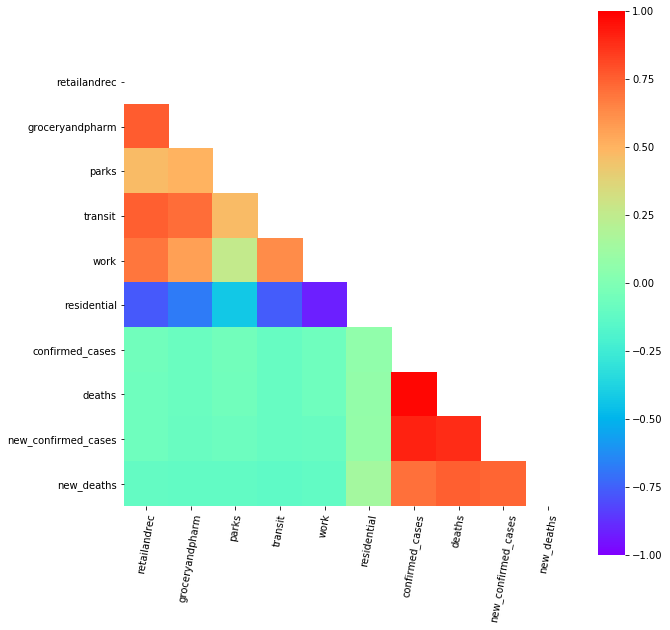

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import sys
import datetime
#movement data starts feb 15
camove = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/onlyca 7dash13.csv')
cadata = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/cadata.csv')
camove=camove.rename(columns={"sub_region_2":"county","retail_and_recreation_percent_change_from_baseline": "retailandrec","grocery_and_pharmacy_percent_change_from_baseline": "groceryandpharm","parks_percent_change_from_baseline":"parks","transit_stations_percent_change_from_baseline":"transit","workplaces_percent_change_from_baseline":"work","residential_percent_change_from_baseline":"residential"})
camove=camove.drop(columns=['Unnamed: 0','country_region_code','country_region','sub_region_1','iso_3166_2_code','census_fips_code'])
cadata=cadata.drop(columns=['fips'])
#print(camove)

camove=camove.set_index(['county','date'])
cadata=cadata.set_index(['county','date'])
#sns.lineplot(x=ladata['date'], y=ladata['new_confirmed_cases'])
#cadata=cadata.sort_index(axis=0)
#cadata=cadata.set_index(['county','data'])

#print(camove)
#print(cadata)
new_df = camove.merge(cadata,how='inner', left_index=True, right_index=True)


corr=new_df.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.figure(figsize=(10,10))

thing = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='rainbow',
    square=True,
    mask=mask
)
thing.set_xticklabels(labels=thing.get_xticklabels(),rotation=80)
new_df=new_df.sort_index(axis=0)
new_df.to_csv("completedataset.csv")




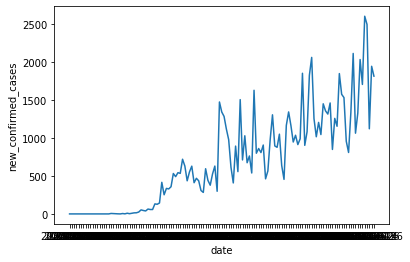

In [71]:
plt.figure(figsize=(20,10))
ladata=cadata[cadata['county']=='Los Angeles']
sns.lineplot(x=la['date'], y=la['retailandrec'])
sns.lineplot(x=la['date'], y=la['groceryandpharm'])
sns.lineplot(x=la['date'], y=la['parks'])
sns.lineplot(x=la['date'], y=la['transit'])
sns.lineplot(x=la['date'], y=la['work'])
sns.lineplot(x=la['date'], y=la['residential'])

KeyError: 'county'

<Figure size 1440x720 with 0 Axes>